<a href="https://colab.research.google.com/github/oyjt1/ALP-project/blob/main/day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#machine learning like project 2


Here will use Linear Rigression as our model to analyes housing data


In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


#For fun you could try doing Linear Regression by yourself

#we will just go ahead and use the function.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
 file_path = '/content/housing.csv'
 data = pd.read_csv(file_path)
 data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

NameError: name 'df' is not defined

In [ ]:
data_cleaned1 = data.dropna()


In [ ]:
data.describe ()

In [ ]:
#We are creating a graph of the median house valuse
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], color='green', kde=True)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Values')
plt.show()

# Using Interquartile Range to Remove Outlier

In [ ]:
Q1 = data['median_house_value'].quantile(0.25)
print(Q1)

119600.0


In [ ]:
Q3 = data['median_house_value'].quantile(0.75)
IQR=Q3-Q1

print(IQR)

145125.0


In [ ]:
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
data_no_outliers_1= data[(data['median_house_value'] >= Lower_Whisker) & (data['median_house_value'] <= Upper_Whisker)]
print("Original Shape:", data.shape)
print("New data shape without outliers",data_no_outliers_1)

Original Shape: (20640, 10)
New data shape without outliers        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           6

B

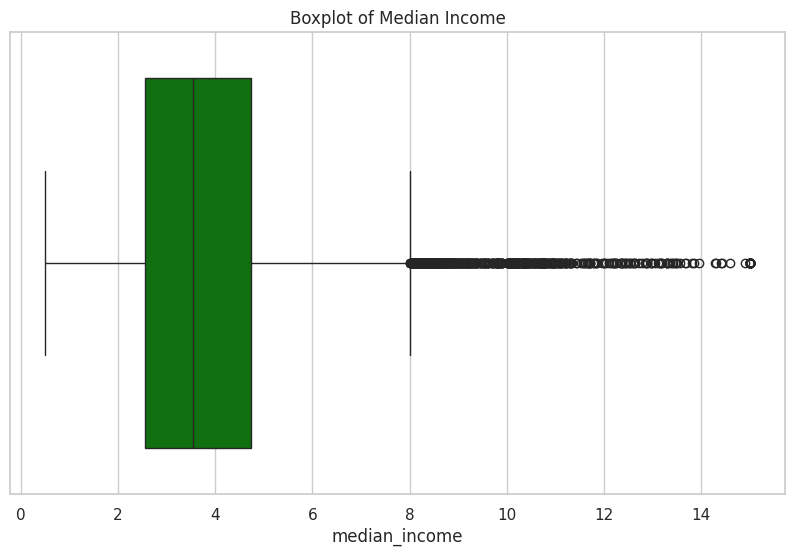

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned2['median_income'],color='green')
plt.title('Boxplot of Median Income')
plt.show()

In [ ]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19569, 10)
Data shape without outliers: (19218, 10)


In [ ]:
numeric_data = data_no_outliers_2.select_dtypes(include=[np.number])


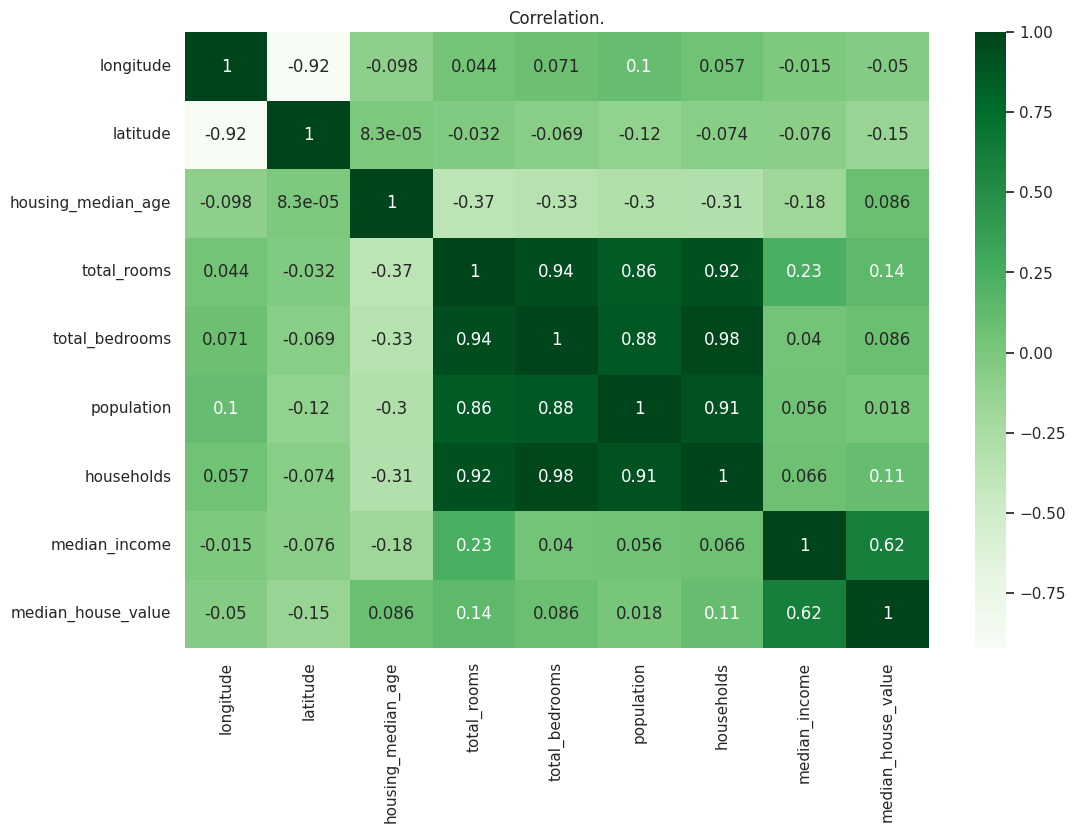

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Greens')
plt.title('Correlation.')
plt.show()

In [ ]:
# prompt: Why do we drog total bedrooms drop

data.corr()


ValueError: could not convert string to float: 'NEAR BAY'

Why do we drog total bedrooms drop it because it has a hig hcoreelation with households and total rooms
and givrs

In [ ]:
data_cleaned2 = data.drop(['total_bedrooms'], axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
data_cleaned2.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

# Unique values in ocean Promixay

In [ ]:
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]
data = data_no_outliers_2
data= data.drop(['total_bedrooms'], axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [ ]:
for column in ['ocean_proximity']:
  print(f"Unique values in {column}:")
  print(data[column].unique())

Unique values in ocean_proximity:
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


String data categorizatoin to dummy variables

In [ ]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity').astype(int)
data=pd.concat([data.drop("ocean_proximity",axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
data = data.drop("ocean_proximity_ISLAND", axis =1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

SPLITTING THE DATA INT O TRAIN AND TEST


In [ ]:
[187]
#Define our features(independent variable )and target(dependent variable)
features= ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ['median_house_value']

x= data[features]
y= data[target]
#split the data into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)
#check the size of the split
print(f'Training set size: {len(x_train)}')
print(f'Test set size: {len(x_test)}')


Training set size: 15374
Test set size: 3844


In [ ]:
#
x_train_scaled = sm.add_constant(x_train)
x_train_scaled

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14672,1.0,-117.11,32.82,16.0,3980.0,3174.0,647.0,2.6607,0,1
8071,1.0,-118.17,33.82,50.0,3587.0,1513.0,651.0,5.5106,0,1
3647,1.0,-118.45,34.22,8.0,2609.0,1803.0,695.0,2.7714,0,0
13199,1.0,-117.69,34.06,25.0,1881.0,1337.0,417.0,2.5536,0,0
7903,1.0,-118.05,33.86,16.0,2676.0,1377.0,395.0,6.5513,0,0
...,...,...,...,...,...,...,...,...,...,...
11754,1.0,-121.17,38.76,14.0,2028.0,781.0,251.0,6.5322,0,0
4183,1.0,-118.23,34.13,48.0,737.0,462.0,131.0,3.5893,0,0
8213,1.0,-118.18,33.79,20.0,1255.0,1201.0,318.0,1.2206,0,1
17084,1.0,-122.20,37.47,37.0,1403.0,1587.0,331.0,2.8258,1,0


In [ ]:
model_fitted=sm.OLS(y_train,x_train_scaled).fit()#fits the model to the data
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2303.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:30:41   Log-Likelihood:            -1.9105e+05
No. Observations:               15374   AIC:                         3.821e+05
Df Residuals:                   15364   BIC:                         3.822e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.077e+06   7.13e+04    -43.130      0.000   -3.22e+06   -2.94e+06
longitude                  -3.686e+04    806.938    -45.675      0.000   -3.84e+04   -3.53e+04
latitude                   -3.678e+04    738.642    -49.790      0.000   -3.82e+04   -3.53e+04
housing_median_age           901.4346     45.266     19.914      0.000     812.708     990.161
total_rooms                   -4.9505      0.713     -6.948      0.000      -6.347      -3.554
population                   -32.4439      1.038    -31.268      0.000     -34.478     -30.410
households                   135.6823      4.458     30.435      0.000     126.944     144.421
median_income               3.752e+04    425.727     88.141      0.000    3.67e+04    3.84e+04
ocean_proximity_NEAR BAY    2115.9316   1929.630      1.097      0.273   -1666.371    5898.234
ocean_proximity_NEAR OCEAN  7017.5388   1607.114      4.367      0.000    3867.406    1.02e+04
==============================================================================
Omnibus:                     3164.141   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8687.134
Skew:                           1.099   Prob(JB):                         0.00
Kurtosis:                       5.955   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#print summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2303.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:30:44   Log-Likelihood:            -1.9105e+05
No. Observations:               15374   AIC:                         3.821e+05
Df Residuals:                   15364   BIC:                         3.822e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
x_test_scaled = sm.add_constant(x_test)
test_predictions= model_fitted.predict(x_test_scaled)
test_predictions

13247    232033.320147
2657     146510.667343
18550    244929.863883
7796     211617.221203
9961     271126.275109
             ...      
18997    239141.735358
13317    112587.956042
18134    290197.092387
9834     282958.353415
2216     259978.872986
Length: 3844, dtype: float64

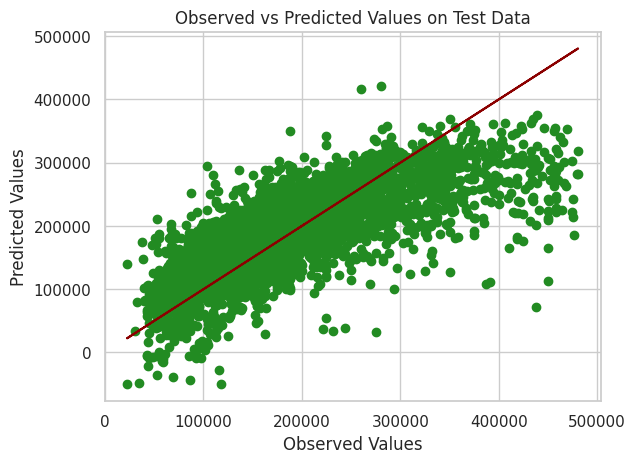

In [ ]:

# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred') # line for perfect prediction (true values)
plt.show()

Checking OLS Assumptions

Asuumption 1 linearity

In [ ]:

mean_residuals = np.mean(model_fitted.resid)
print(f"The mean of the residuals is: {np.round (mean_residuals, 2)}")

The mean of the residuals is: 0.0


In [1]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}") #rounds to two decimal places


NameError: name 'np' is not defined

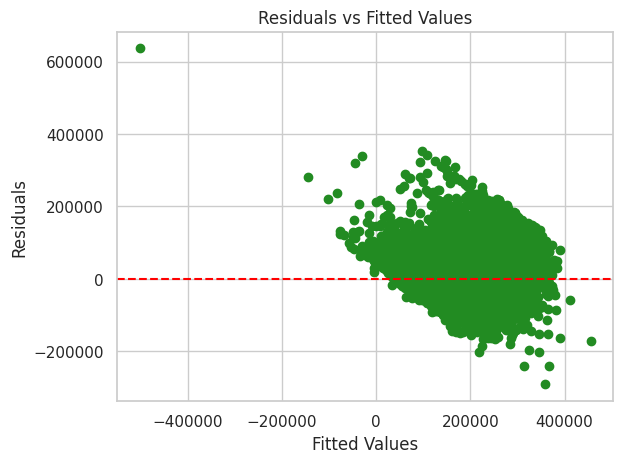

In [ ]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [ ]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in x_train.columns:
    corr_coefficient = np.corrcoef(x_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

NameError: name 'model_fitted' is not defined